In [1]:
# Package
import logging
logging.getLogger('trimesh').disabled = True
logging.getLogger('shapely.geos').disabled = True
logging.getLogger('matplotlib').setLevel(logging.CRITICAL)
import numpy as np
import matplotlib.pyplot as plt
from pvtrace import *
from pvtrace.data import lumogen_f_red_305
import functools
import trimesh
from trimesh import transformations as trf
import math
import random
import time
from pylab import imread
from scipy.ndimage import gaussian_filter
import pyvista as pv
from pyvista import examples
import pandas as pd

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
###############################################
# Creation of the myobj. from vertices/faces
###############################################
# Define vertices
vert = np.array([
    [-1,-1,-1],
    [-1,0,1],
    [-1,1,-1],
    [1,-1,-1],
    [1,0,1],
    [1,1,-1]
    ])

# Define faces
fa = np.array([
    [4,5,2],
    [1,0,3],
    [2,5,3],
    [4,3,5],
    [1,2,0],
    [1,4,2],
    [4,1,3],
    [0,2,3]
    ])
# Create the myobject with trimesh
mesh = trimesh.Trimesh(vertices=vert, faces=fa, process=True, origin=(0,0,0))

# Show me what you got
mesh.show() # Not working with spyder

In [3]:
###############################################
# Creation of the myobj. from stl files
###############################################
# Example010.scad generated by OpenSCAD and Octable
mesh = trimesh.load_mesh("example010.stl", enable_post_processing=True)

# Show me what you got
mesh.show() # Not working with spyder

/home/verbalrazors/anaconda3/envs/pvtrace-env/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


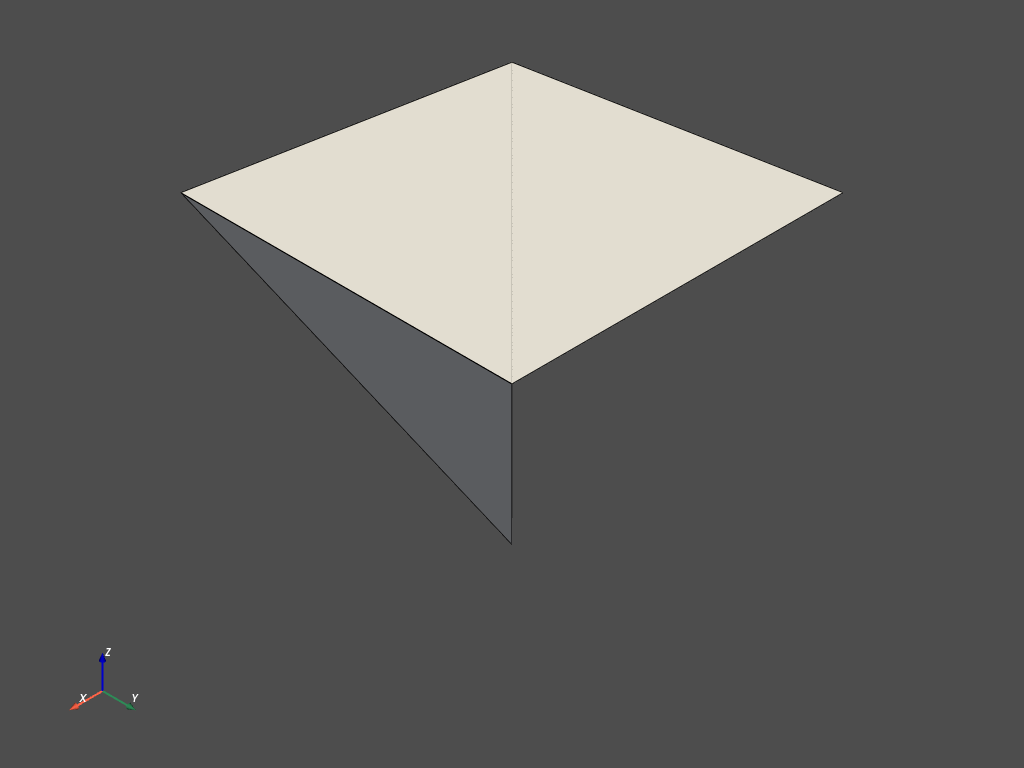

In [4]:
###############################################
# Creation of the myobj. from stl files
###############################################
# mesh points with pyramid
# https://docs.pyvista.org/examples/00-load/create-poly.html
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [1, 1, 0],
                     [0, 1, 0],
                     [0.5, 0.5, -1]])

# mesh faces
faces = np.hstack([[4, 0, 1, 2, 3],  # square
                   [3, 0, 1, 4],     # triangle
                   [3, 1, 2, 4]])    # triangle

mesh = pv.PolyData(vertices, faces)

# Show me what you got
mesh.plot(show_edges=True)

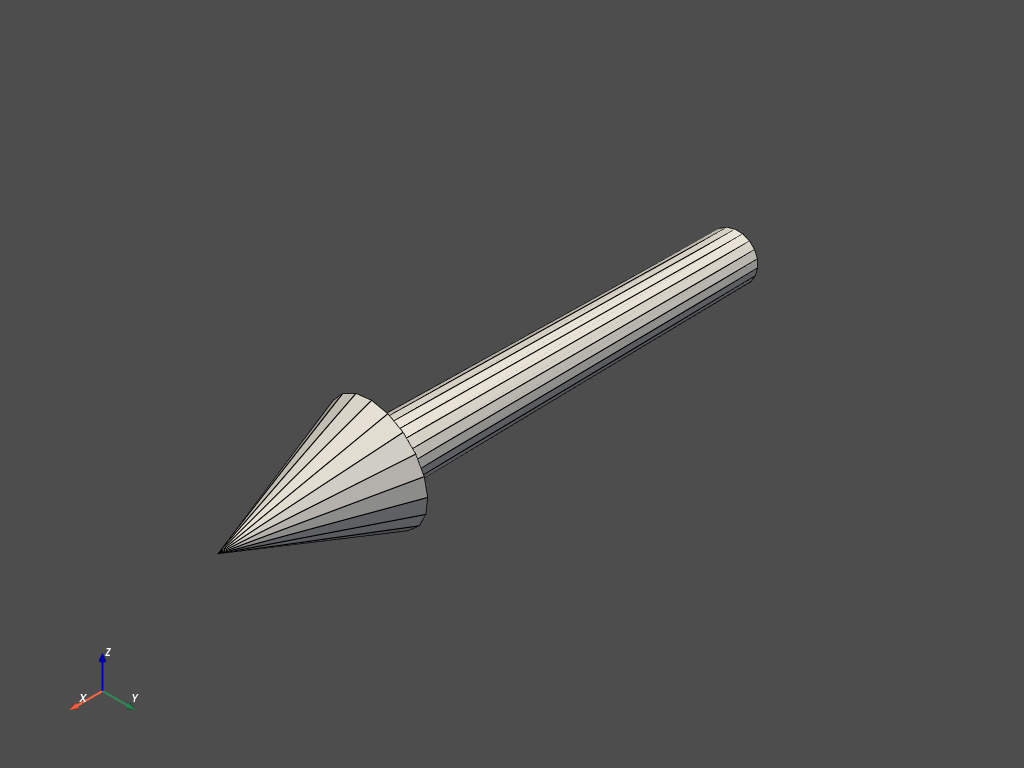

In [5]:
###############################################
# Standard obj https://docs.pyvista.org/examples/00-load/create-geometric-objects.html
# cyl = pv.Cylinder()
arrow = pv.Arrow()
# sphere = pv.Sphere()
# plane = pv.Plane()
# line = pv.Line()
# box = pv.Box()
# cone = pv.Cone()
# poly = pv.Polygon()
# disc = pv.Disc()

arrow.plot(show_edges=True)

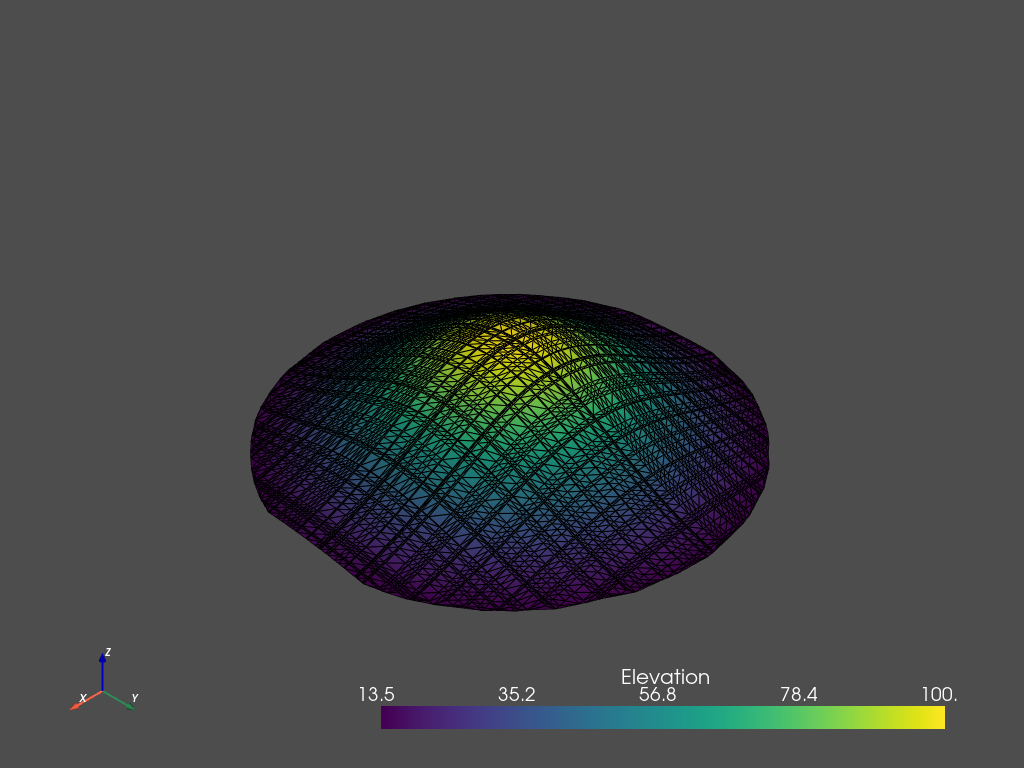

In [6]:
###############################################
# From a matrix
# https://github.com/pyvista/pyvista-support/issues/247
# Function to create a circular Gaussian surface
def gen_gauss_df(A, n, r):
    x = np.linspace(-r, r, num = n) + np.random.uniform(-5, 5, size=n)
    y = np.linspace(-r, r, num = n) + np.random.uniform(-5, 5, size=n)
    xx, yy = np.meshgrid(x, y)
    b = 100
    zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))
    points = np.c_[xx.flatten(), yy.flatten(), zz.flatten()]

    df = pd.DataFrame(points, columns=['x', 'y', 'z'])
    df = df[(df['x'] ** 2 + df['y'] ** 2) < r ** 2]
    return df

# Generate Gaussian point clouds
points = gen_gauss_df(100, 100, 200)
# Create pyvista surface
cloud = pv.PolyData(points.values)
cloud['Elevation'] = points['z'].values

# Generate surfaces for point clouds
surf = cloud.delaunay_2d()
mesh = surf.fill_holes(500)

# Show me what you got
mesh.plot(show_edges=True)

In [7]:
###############################################
# Save obj
mesh.save("myobj.stl")